<a href="https://colab.research.google.com/github/mudassaralye/EDA/blob/main/McDonald's_Menu_Nutritional_Facts_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries and reading csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

df=pd.read_csv('/content/menu.csv',usecols=['Category','Item','Calories','Total Fat','Carbohydrates','Dietary Fiber','Sugars','Protein','Vitamin A (% Daily Value)','Vitamin C (% Daily Value)','Calcium (% Daily Value)','Iron (% Daily Value)'])

Check statistical facts by checking all columns and then calculate the maximum value of the attributes

In [2]:
df.describe()

,Calories,Total Fat,Carbohydrates,Dietary Fiber,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,14.165385,47.346154,1.630769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,14.205998,28.252232,1.567717,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,2.375000,30.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,11.000000,44.000000,1.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,22.250000,60.000000,3.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,118.000000,141.000000,7.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [3]:
df.max()

Category                            Snacks & Sides
Item                         Vanilla Shake (Small)
Calories                                      1880
Total Fat                                    118.0
Carbohydrates                                  141
Dietary Fiber                                    7
Sugars                                         128
Protein                                         87
Vitamin A (% Daily Value)                      170
Vitamin C (% Daily Value)                      240
Calcium (% Daily Value)                         70
Iron (% Daily Value)                            40
dtype: object

Check to see if infact there is any correlation between Calories and other independent variables by plotting a correlation matrix next

<ipython-input-4-87ec05c07b27>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


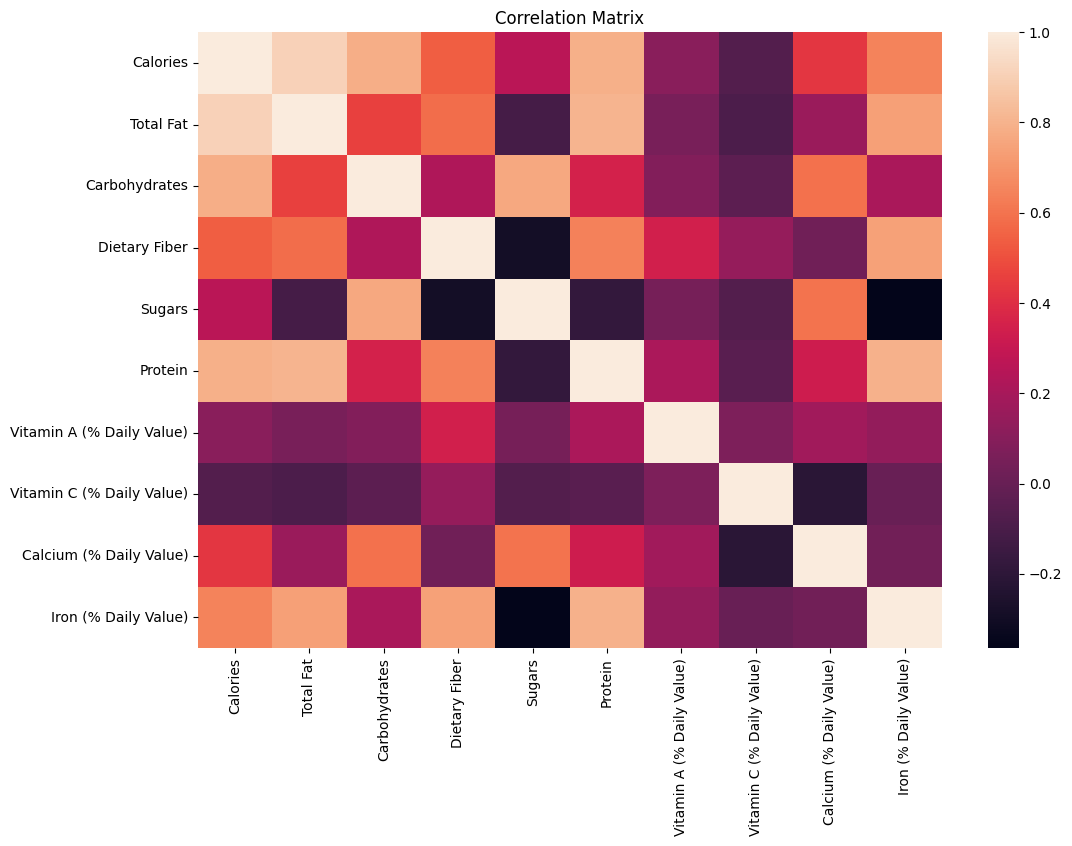

In [4]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())
plt.title('Correlation Matrix')
plt.show()

Draw boxplot for Calories vs Category to spot outliers and max calories category

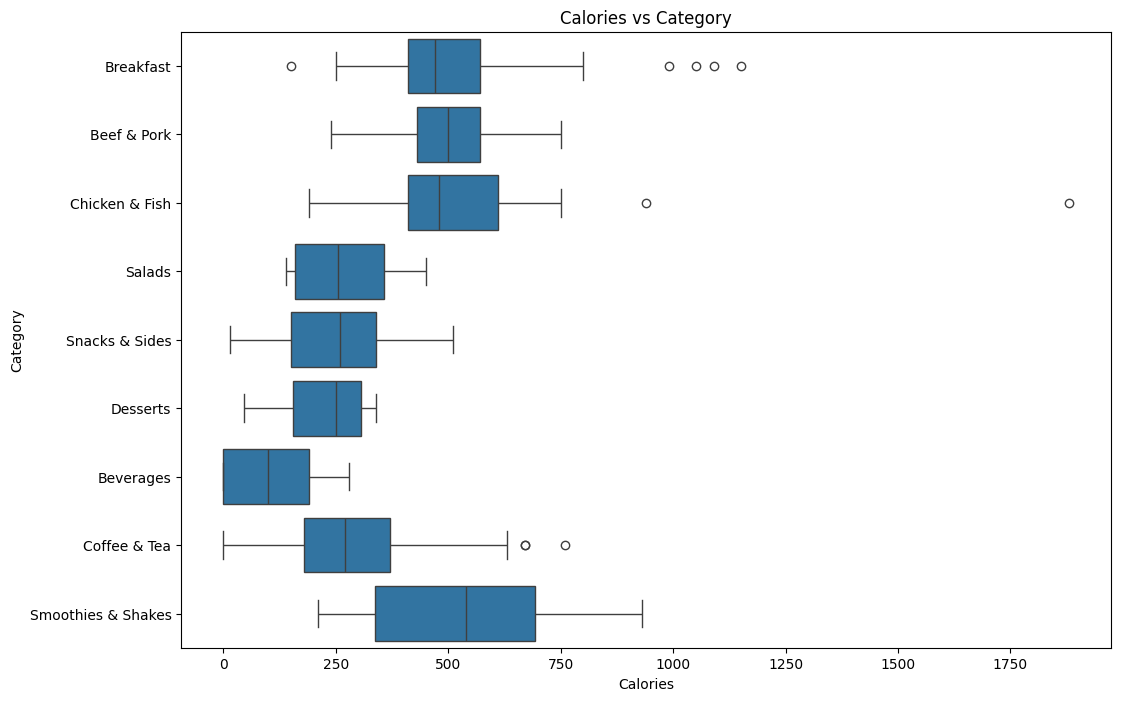

In [5]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Calories',y='Category',data=df)
plt.title('Calories vs Category')
plt.show()

Figure out which exact item contains a high quantity

In [6]:
calories=df.loc[df['Calories'].idxmax(),'Item']
total_fat=df.loc[df['Total Fat'].idxmax(),'Item']
carbohydrates=df.loc[df['Carbohydrates'].idxmax(),'Item']
dietary_fiber=df.loc[df['Dietary Fiber'].idxmax(),'Item']
sugars=df.loc[df['Sugars'].idxmax(),'Item']
protein=df.loc[df['Protein'].idxmax(),'Item']
vitamin_a=df.loc[df['Vitamin A (% Daily Value)'].idxmax(),'Item']
vitamin_c=df.loc[df['Vitamin C (% Daily Value)'].idxmax(),'Item']
calcium=df.loc[df['Calcium (% Daily Value)'].idxmax(),'Item']
iron=df.loc[df['Iron (% Daily Value)'].idxmax(),'Item']

print("Calories:",calories,"-",df['Calories'].max())
print("Total Fat:",total_fat,"-",df['Total Fat'].max())
print("Carbohydrates:",carbohydrates,"-",df['Carbohydrates'].max())
print("Dietary Fiber:",dietary_fiber,"-",df['Dietary Fiber'].max())
print("Sugars:",sugars,"-",df['Sugars'].max())
print("Protein:",protein,"-",df['Protein'].max())
print("Vitamin A (% Daily Value):",vitamin_a,"-",df['Vitamin A (% Daily Value)'].max())
print("Vitamin C (% Daily Value):",vitamin_c,"-",df['Vitamin C (% Daily Value)'].max())
print("Calcium (% Daily Value):",calcium,"-",df['Calcium (% Daily Value)'].max())
print("Iron (% Daily Value):",iron,"-",df['Iron (% Daily Value)'].max())

Calories: Chicken McNuggets (40 piece) - 1880
Total Fat: Chicken McNuggets (40 piece) - 118.0
Carbohydrates: Chocolate Shake (Large) - 141
Dietary Fiber: Big Breakfast with Hotcakes (Large Biscuit) - 7
Sugars: McFlurry with M&M’s Candies (Medium) - 128
Protein: Chicken McNuggets (40 piece) - 87
Vitamin A (% Daily Value): Premium Bacon Ranch Salad (without Chicken) - 170
Vitamin C (% Daily Value): Minute Maid Orange Juice (Large) - 240
Calcium (% Daily Value): Strawberry Shake (Large) - 70
Iron (% Daily Value): Big Breakfast with Hotcakes (Regular Biscuit) - 40


 Draw Stripplot for each category against the following attributes

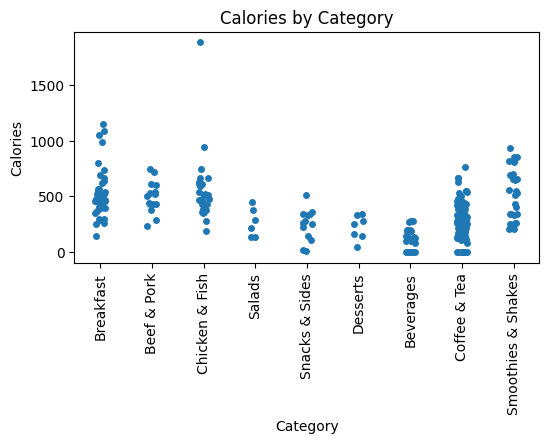

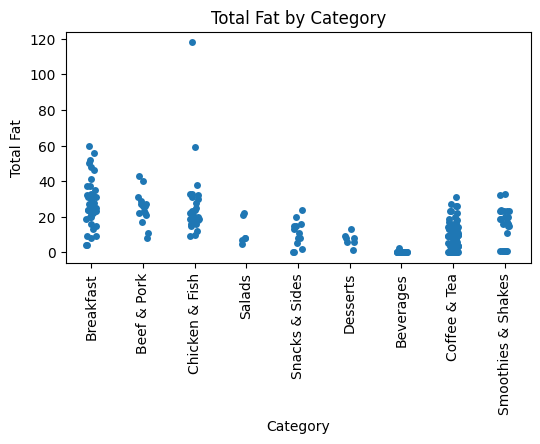

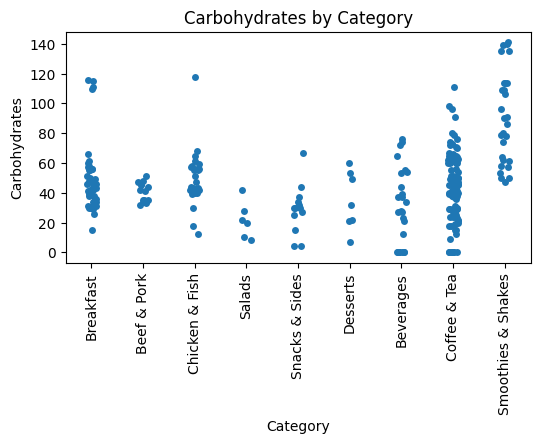

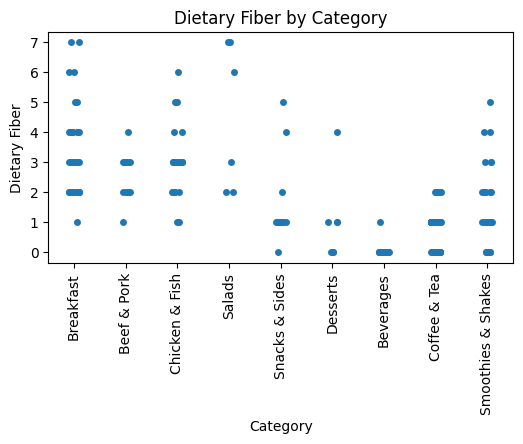

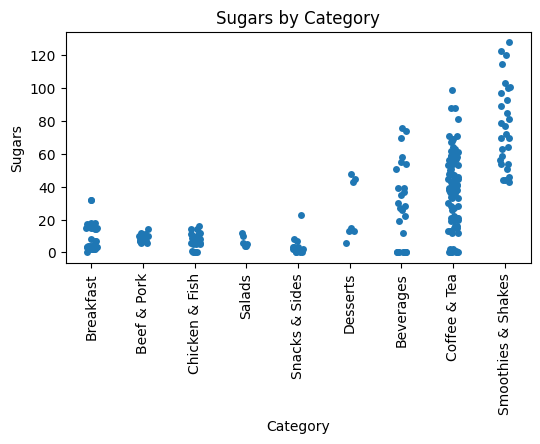

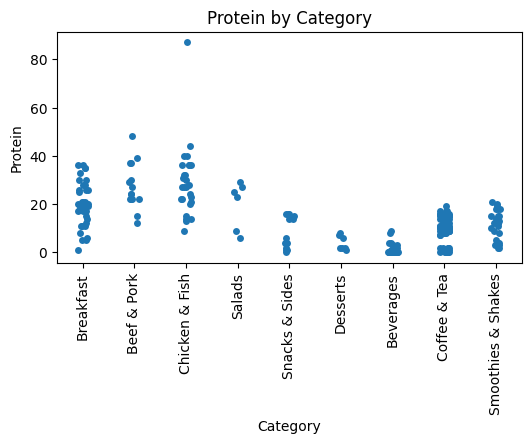

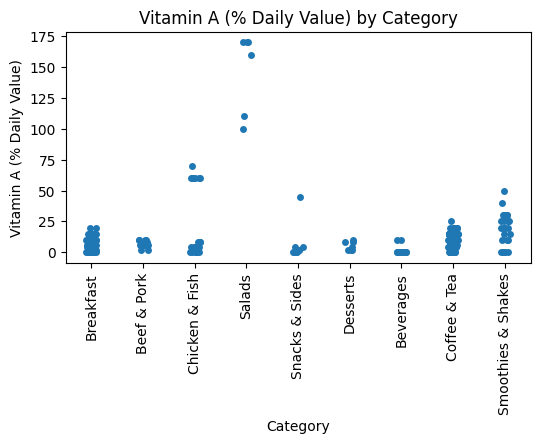

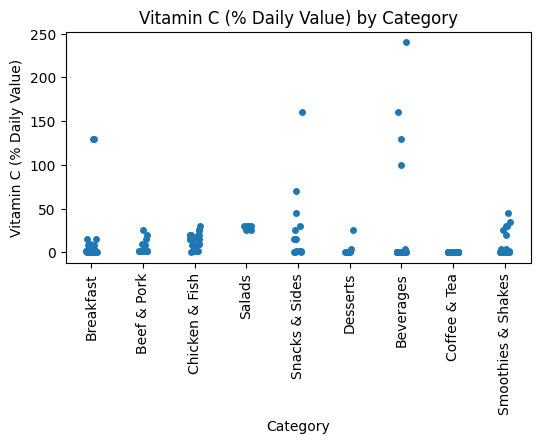

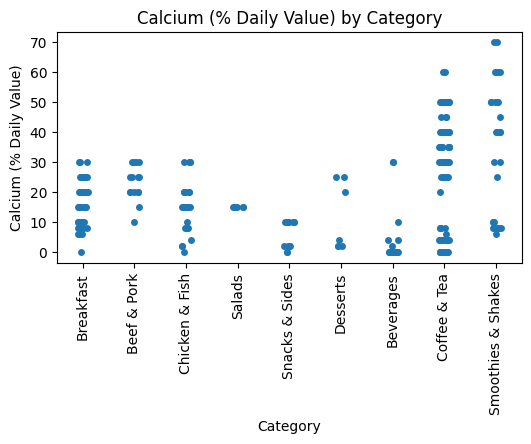

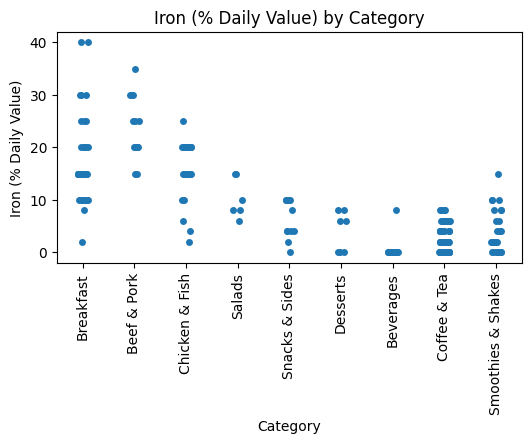

In [7]:
attributes=['Calories','Total Fat','Carbohydrates','Dietary Fiber','Sugars','Protein','Vitamin A (% Daily Value)','Vitamin C (% Daily Value)','Calcium (% Daily Value)','Iron (% Daily Value)']
for attribute in attributes:
    plt.figure(figsize=(6,3))
    sns.stripplot(x='Category',y=attribute,data=df,jitter=True)
    plt.title(f'{attribute} by Category')
    plt.xticks(rotation=90)
    plt.show()

Draw a horizontal bar graph for items in each category against the calories.

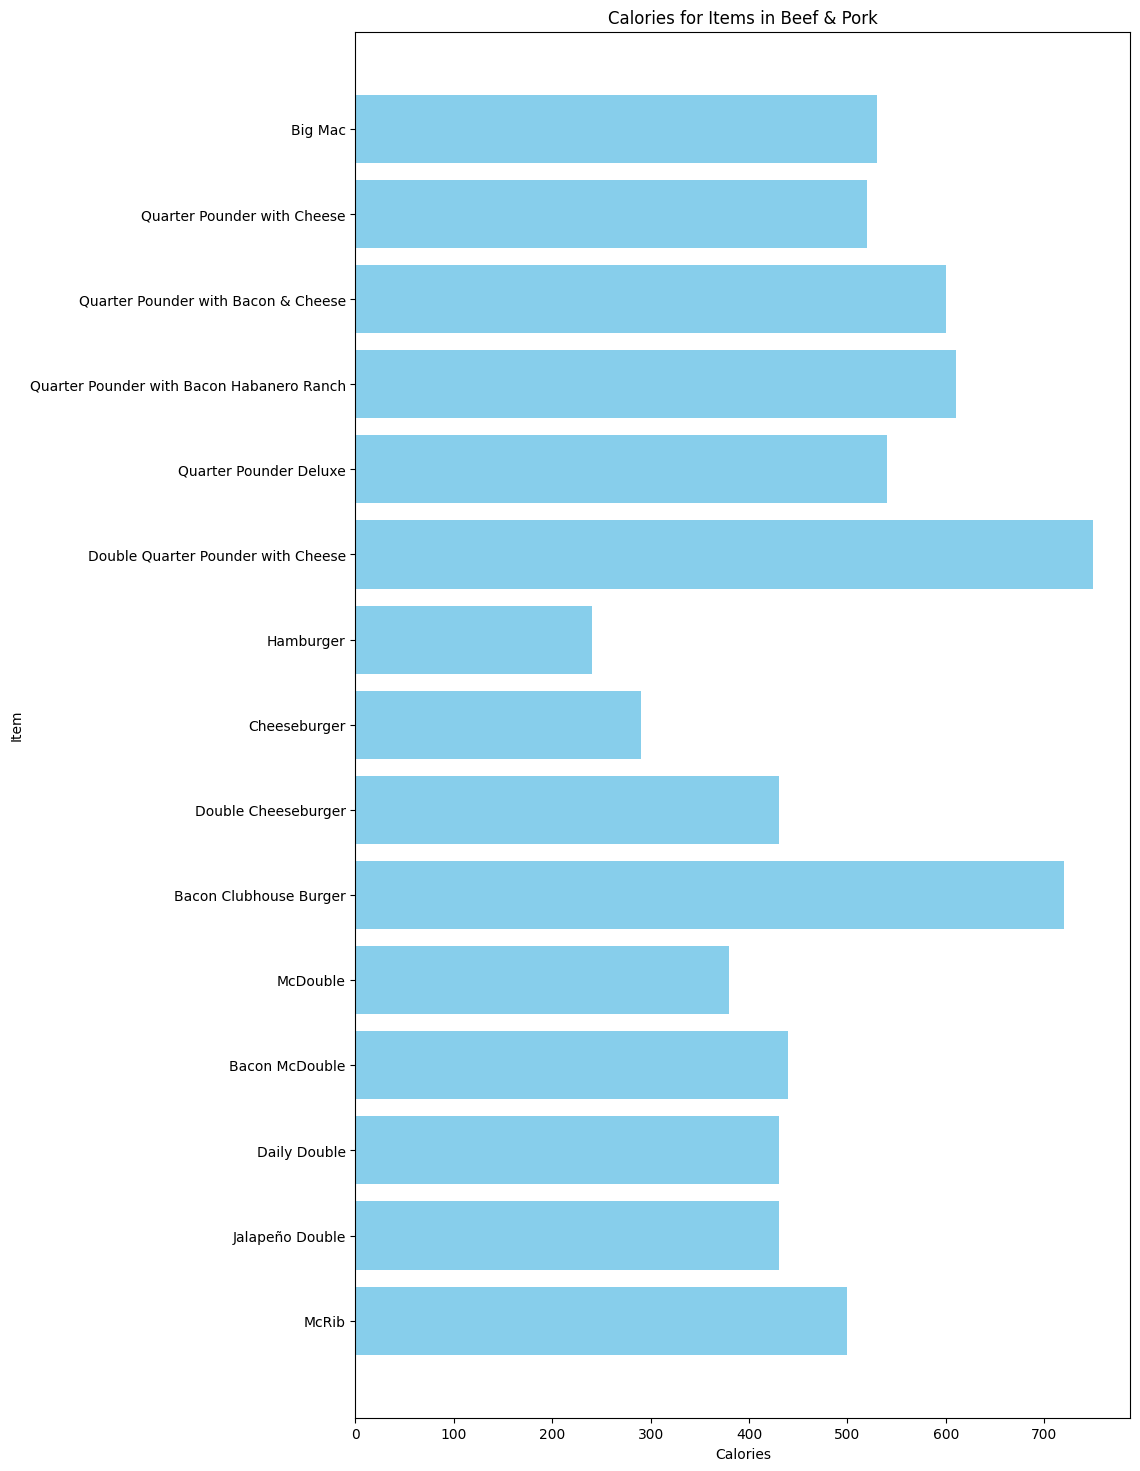

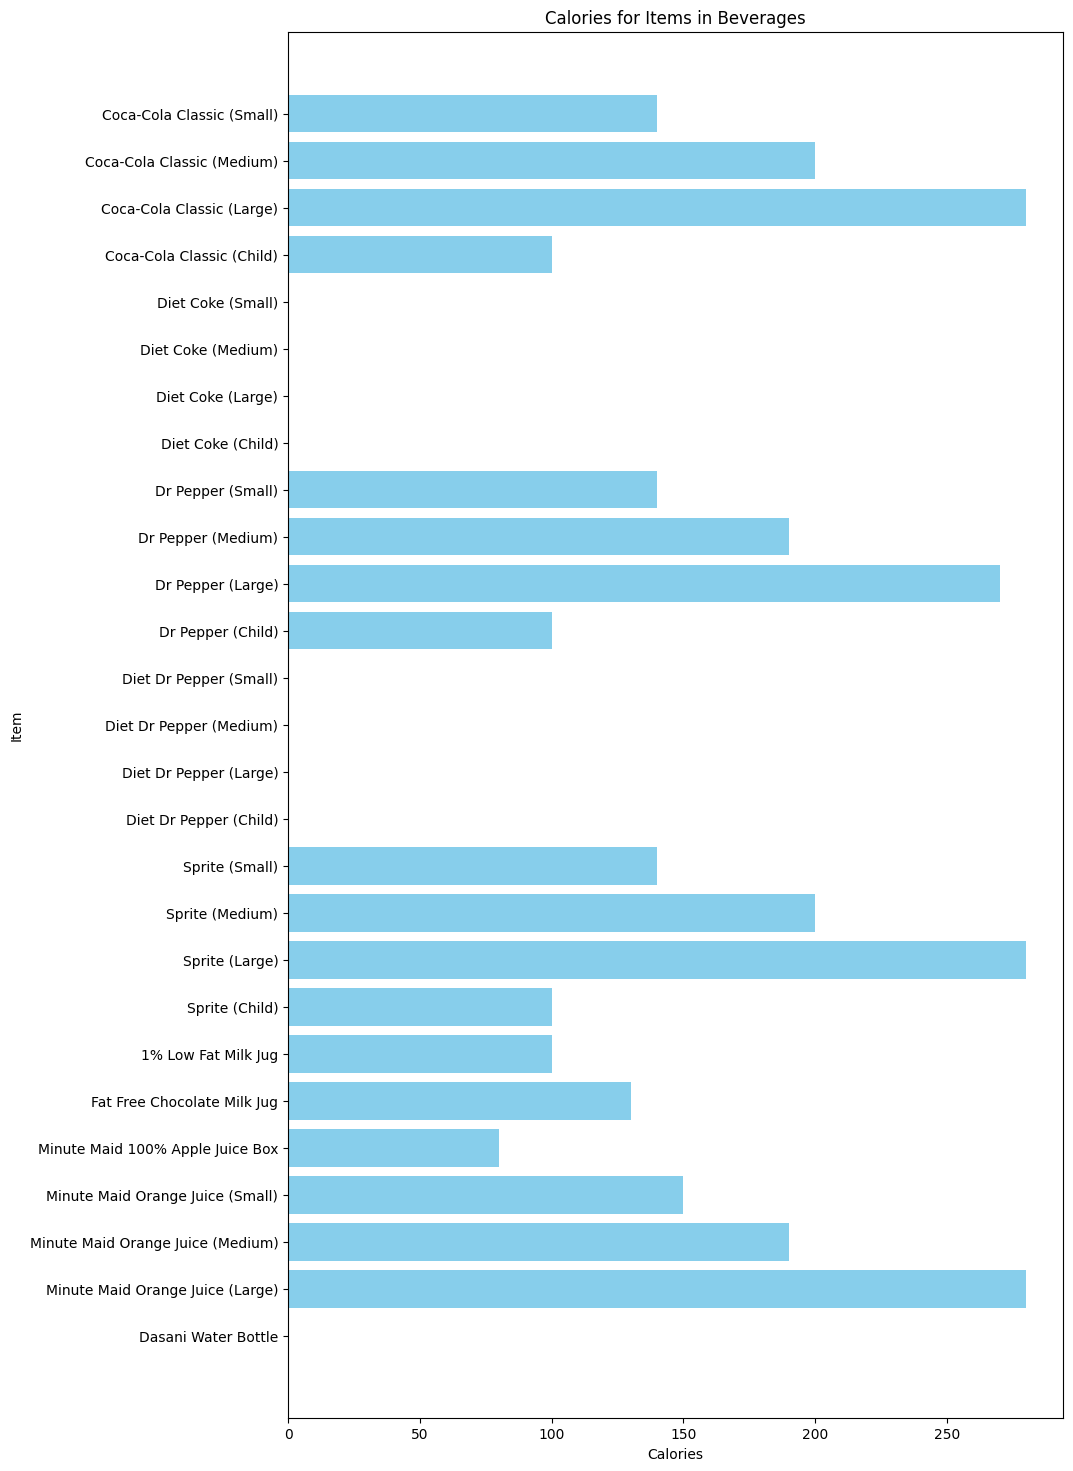

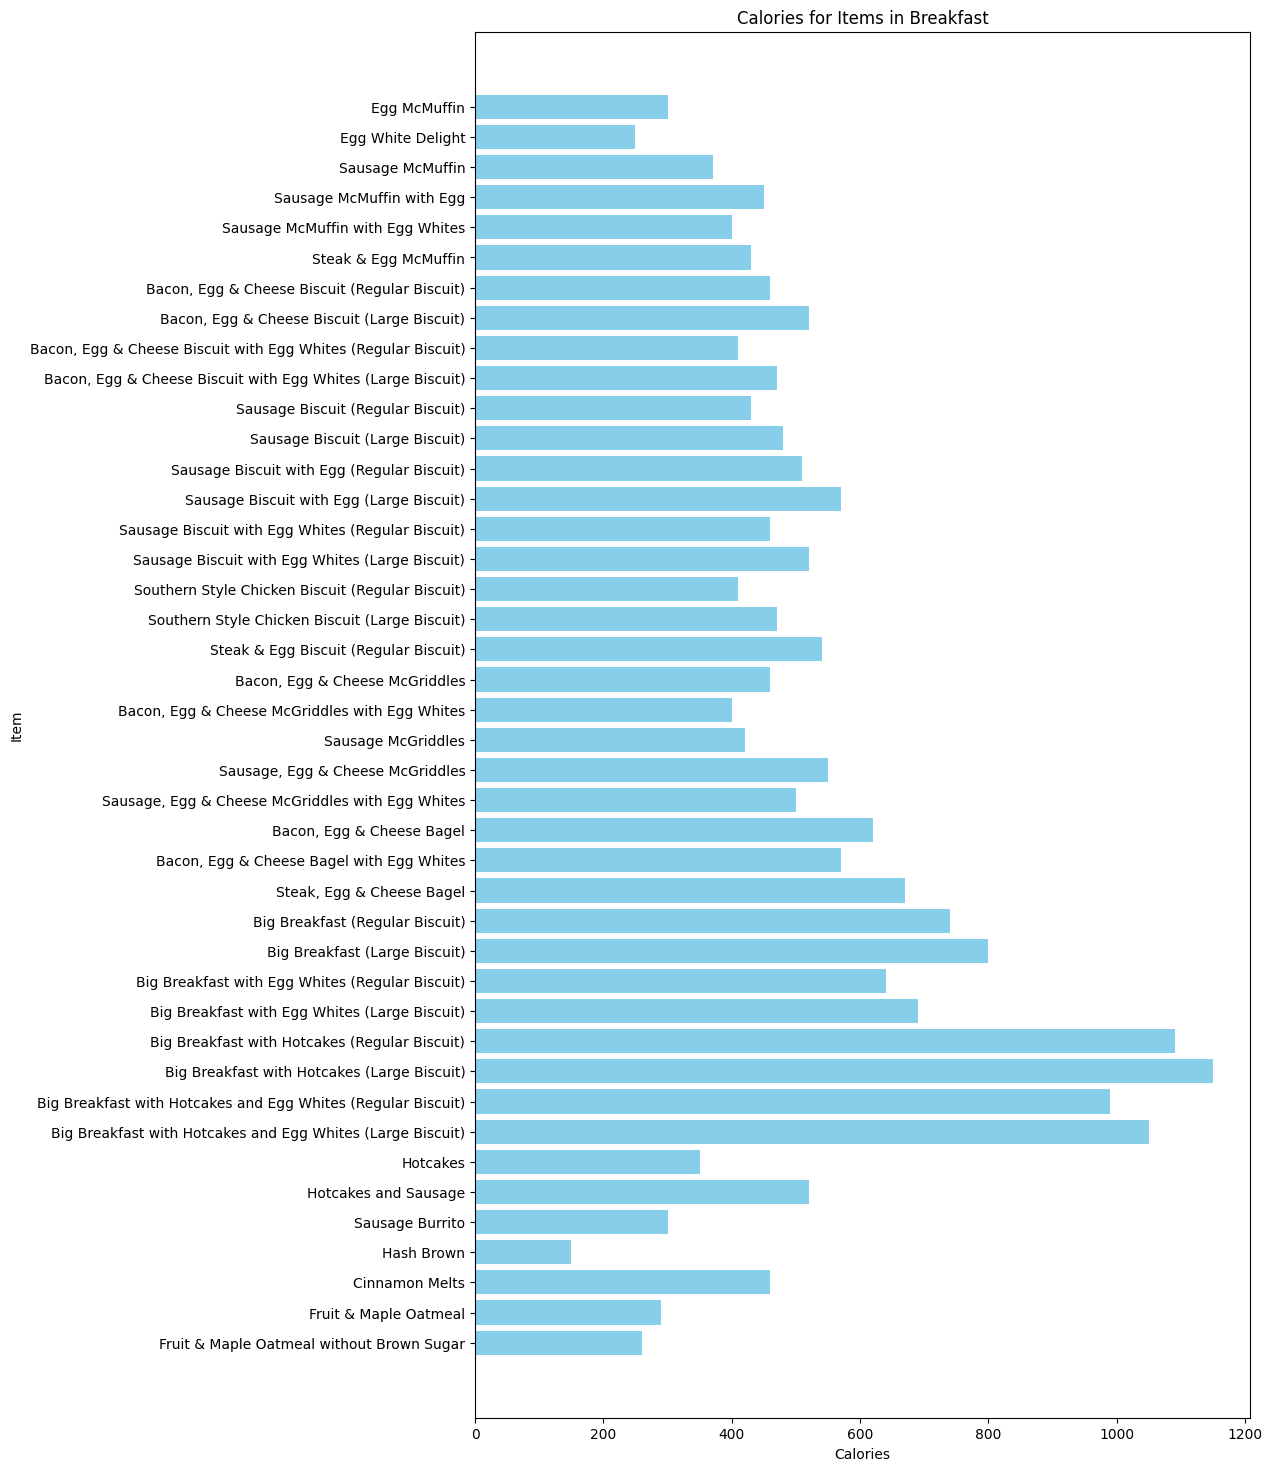

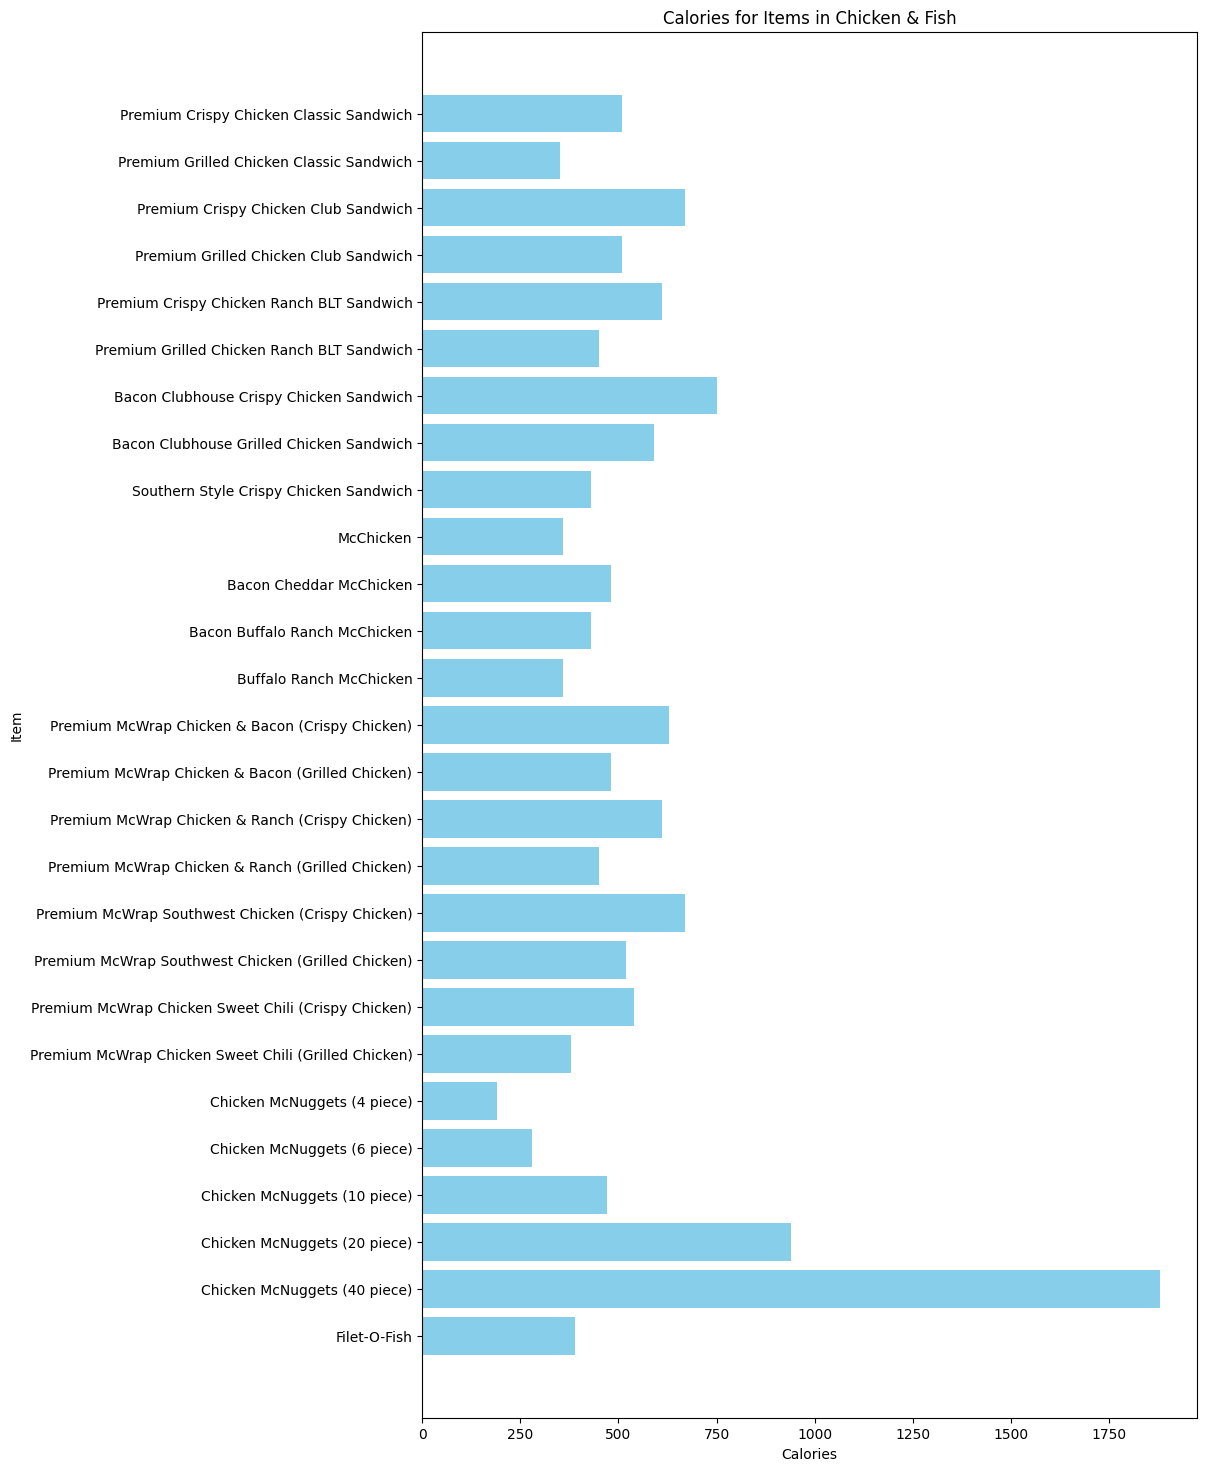

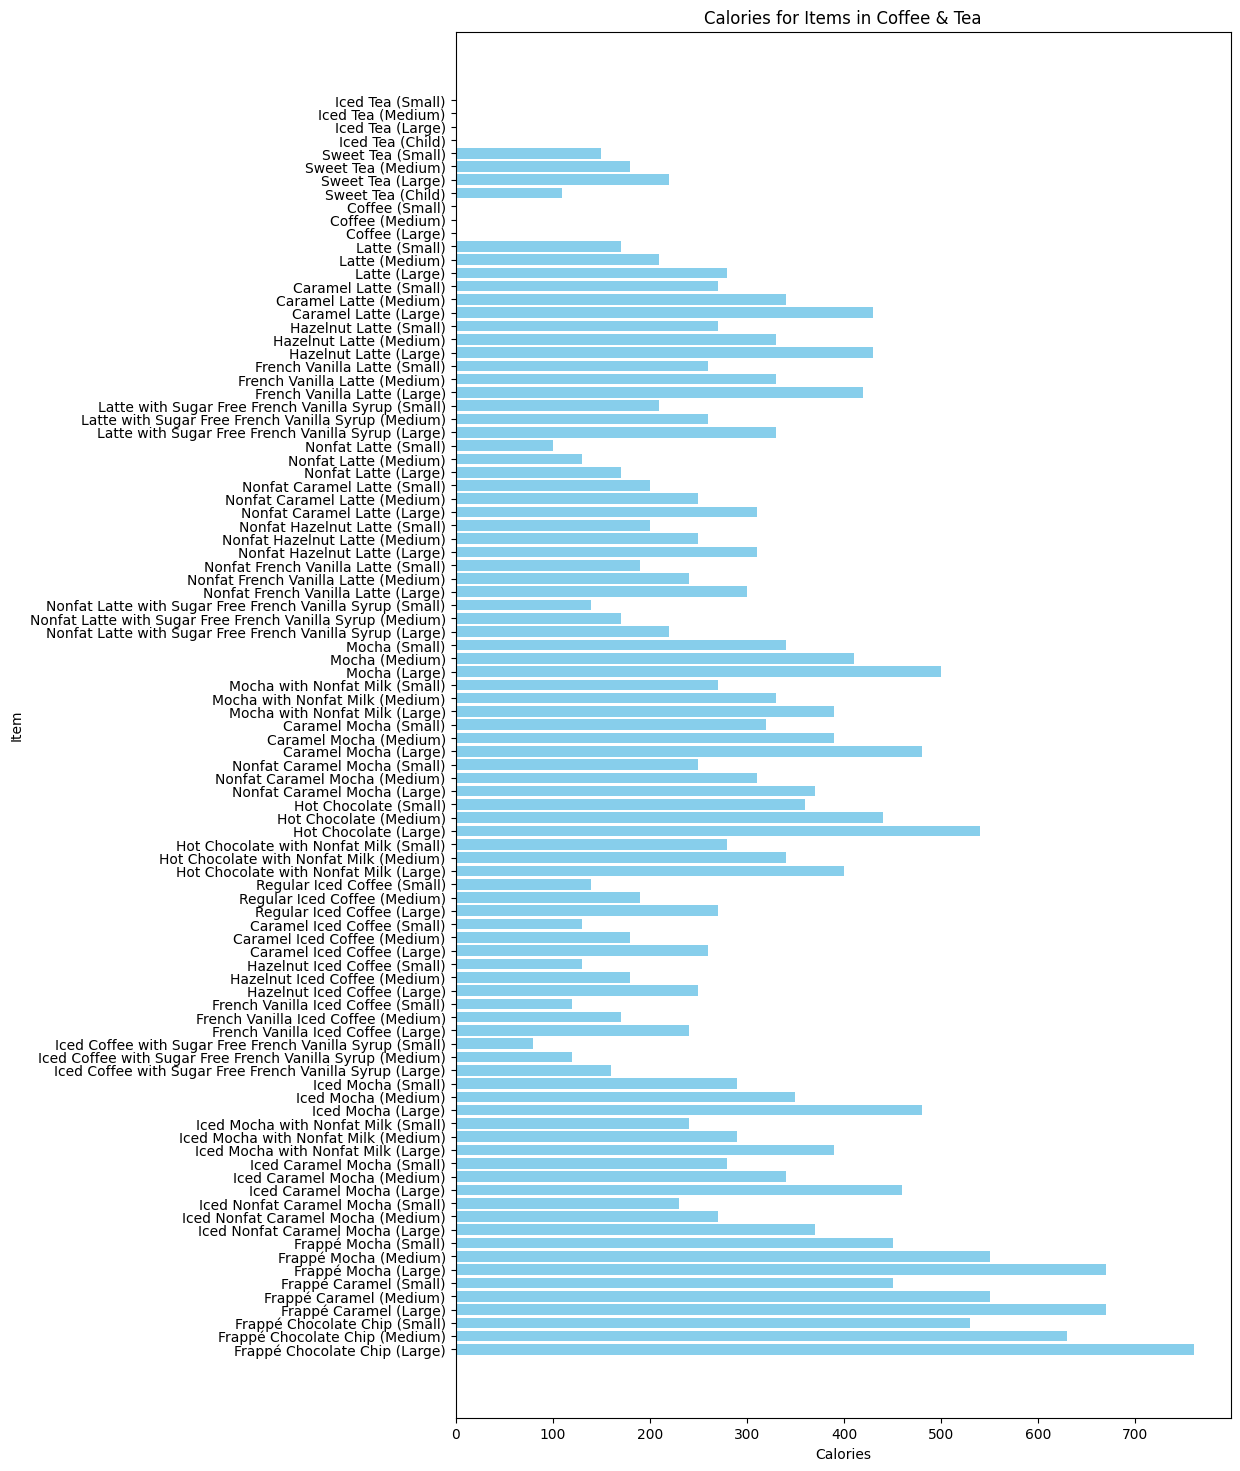

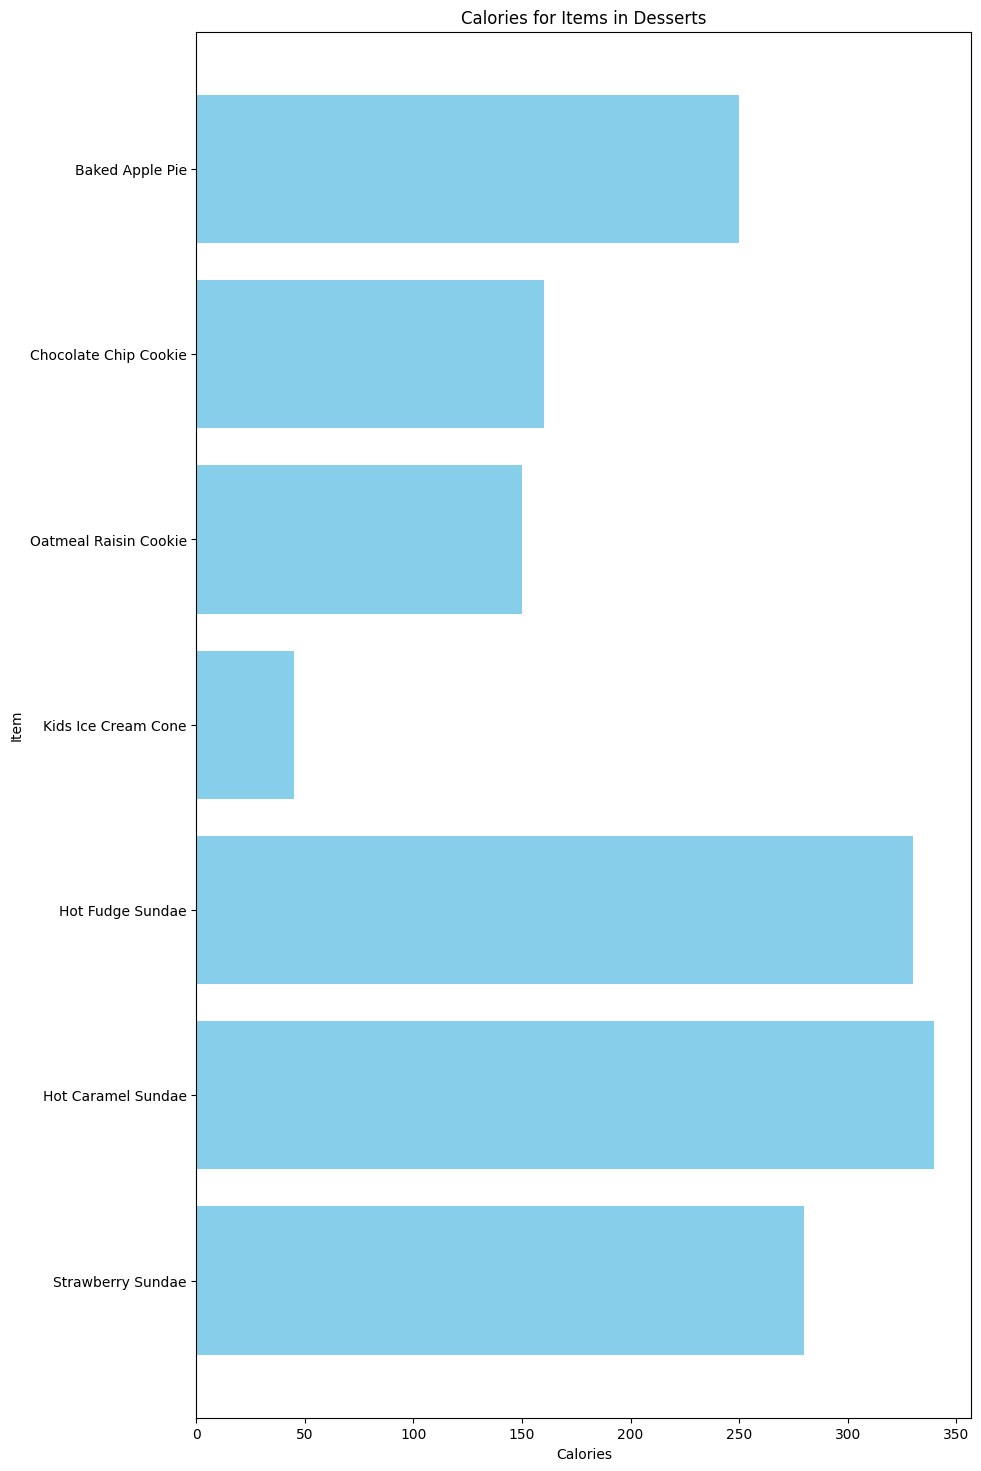

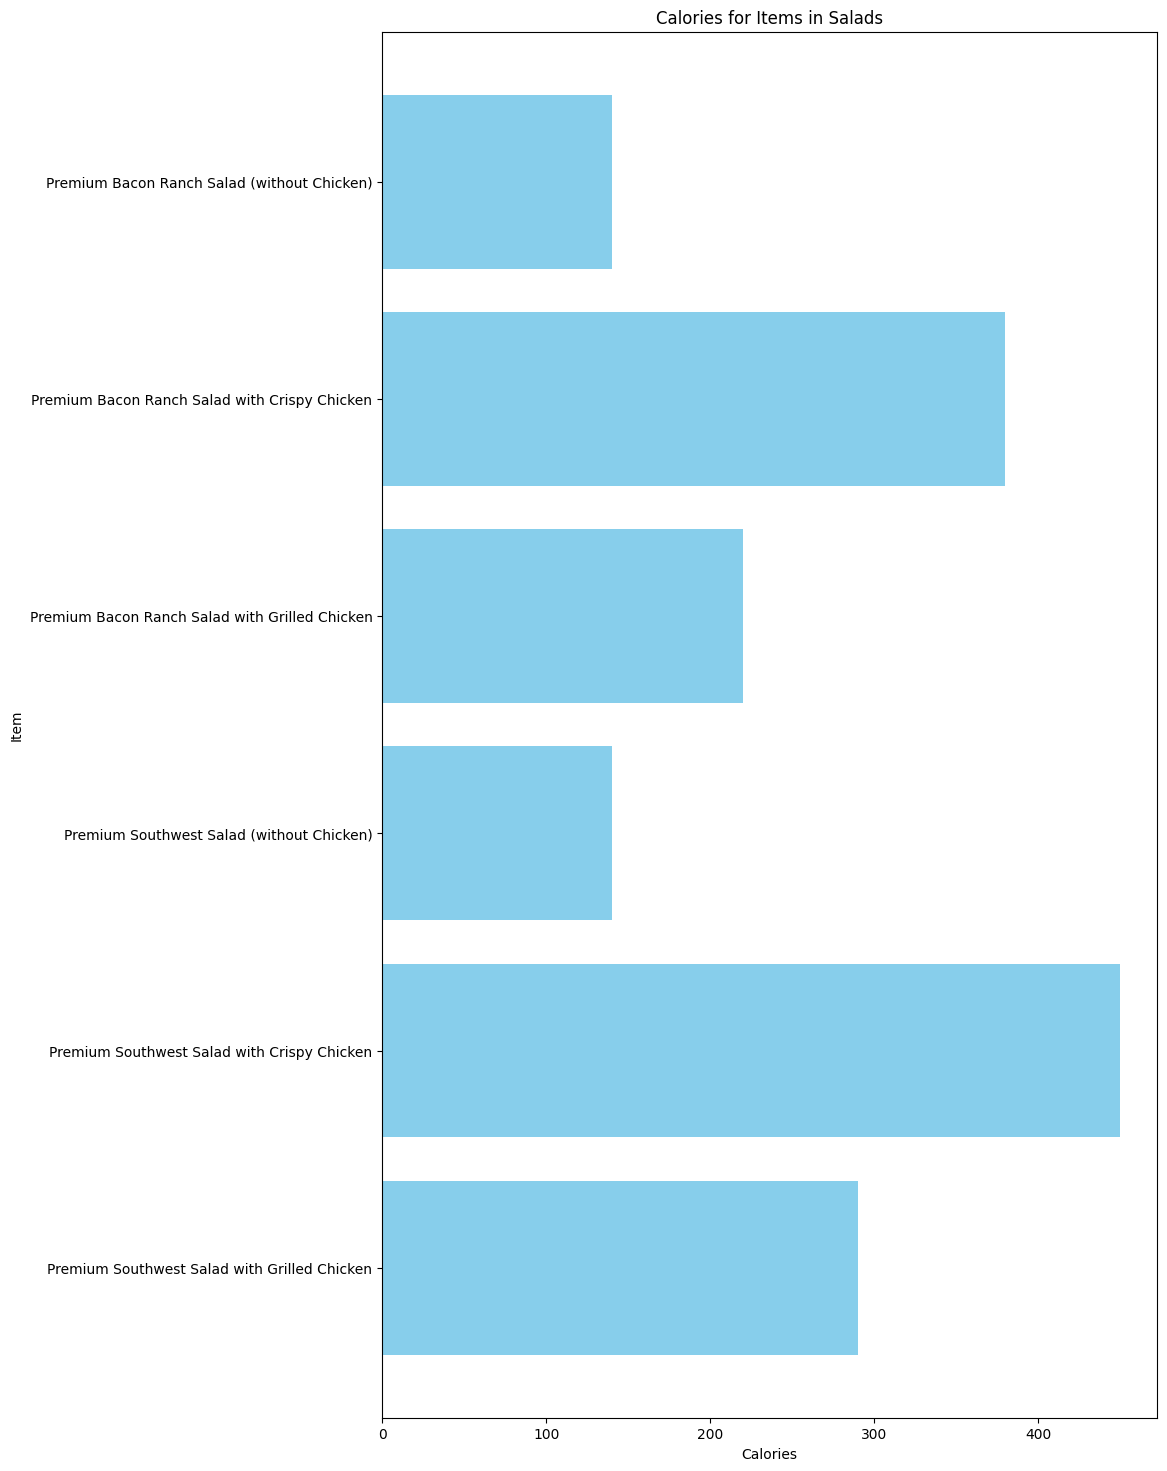

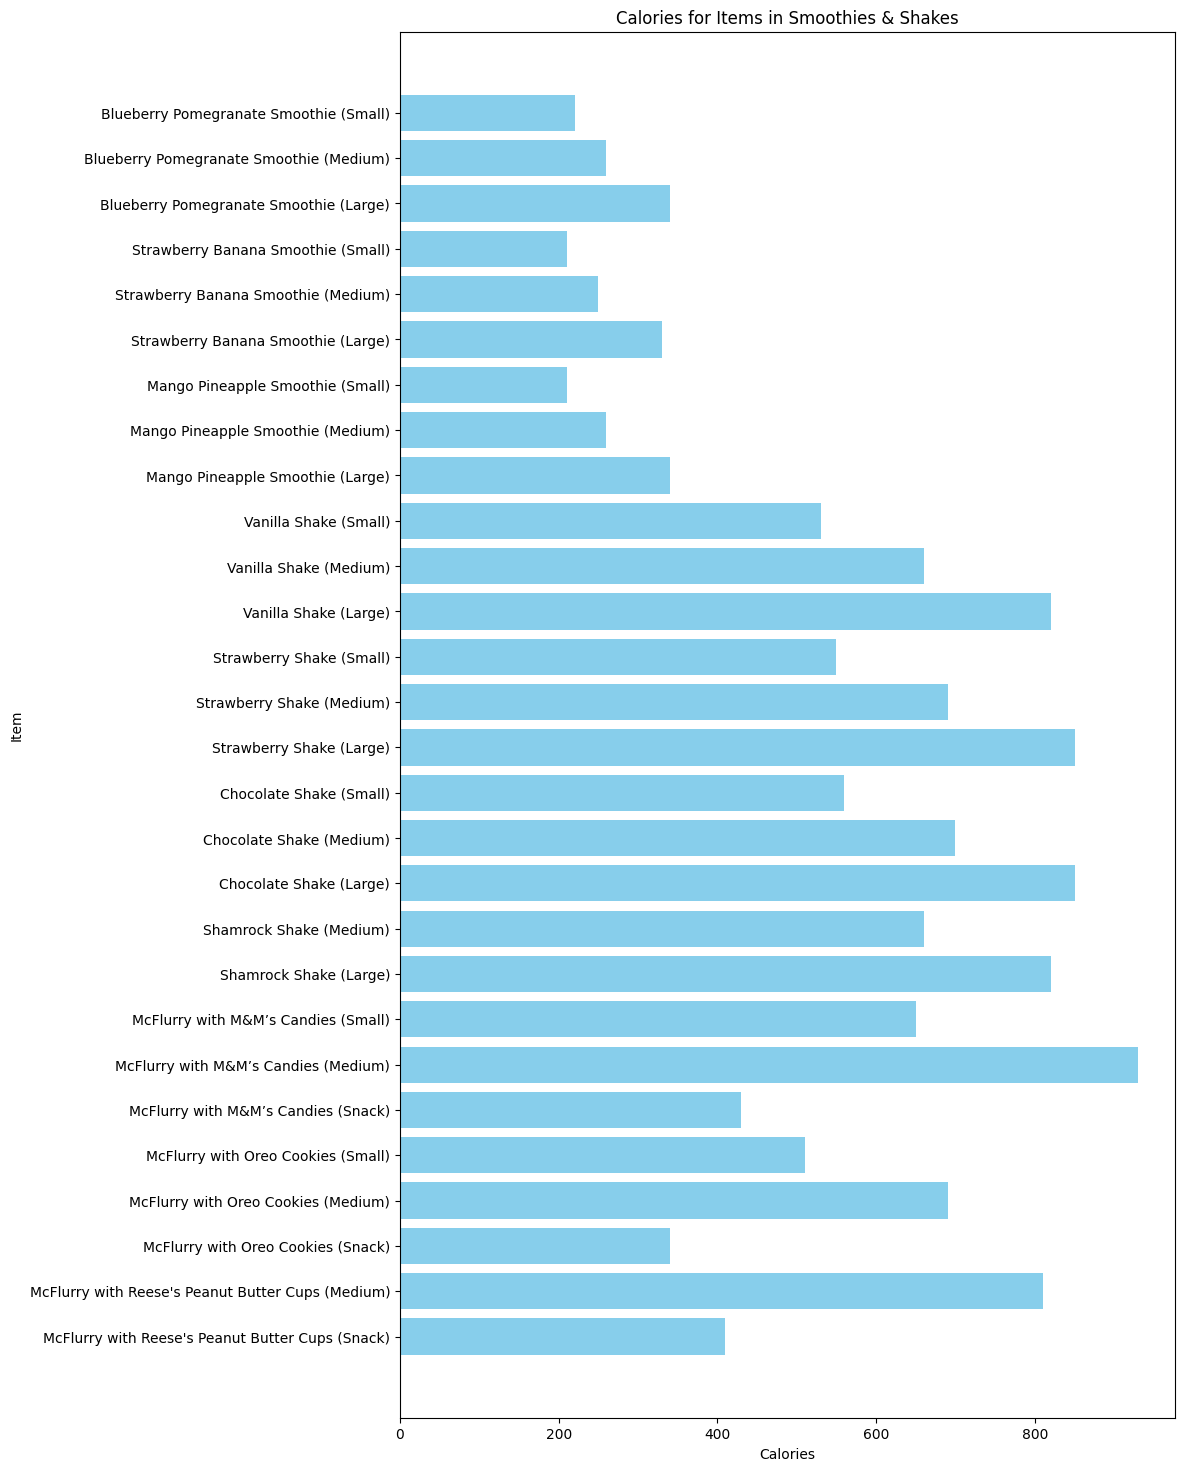

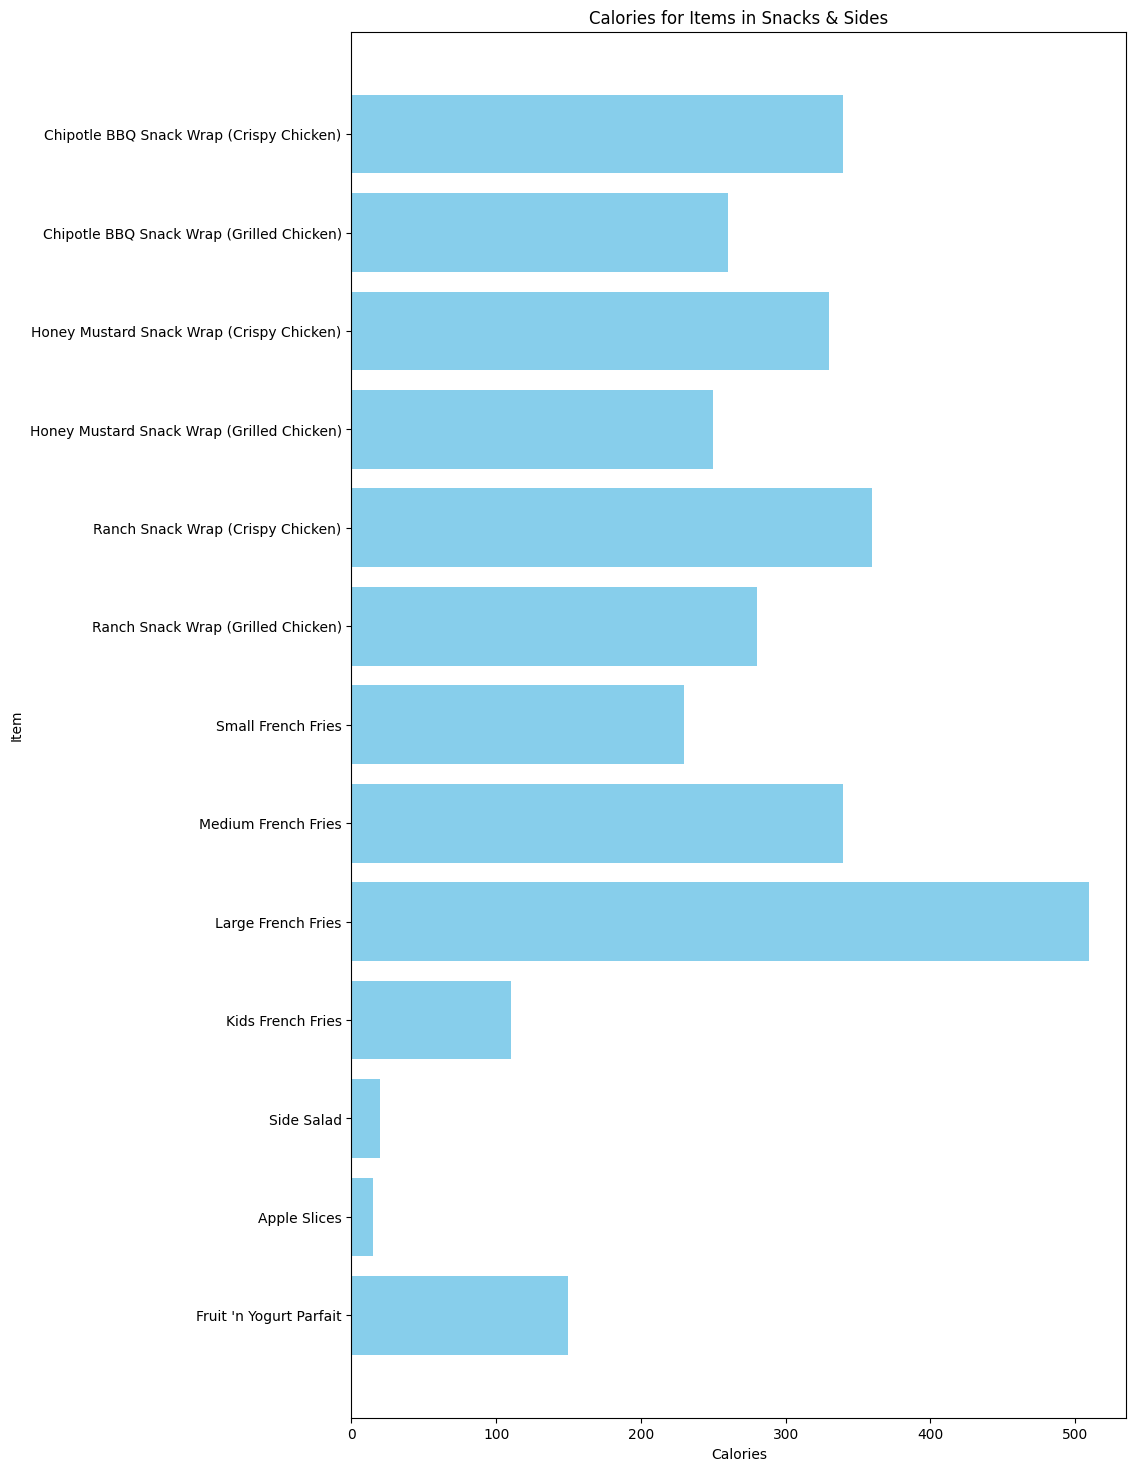

In [8]:
grouped=df.groupby('Category')
for category,data in grouped:
    plt.figure(figsize=(10,18))
    plt.barh(data['Item'],data['Calories'],color='skyblue')
    plt.xlabel('Calories')
    plt.ylabel('Item')
    plt.title(f'Calories for Items in {category}')
    plt.gca().invert_yaxis()
    plt.show()

**Observations**

1. **Varied Calorie Ranges**: The calorie counts of items within each category vary significantly. For example, within the "Beef & Pork" category, some items have relatively low calorie counts, while others have much higher counts.
2. **Highest Calorie Items**: Each category has certain items with notably high calorie counts compared to others in the same category. These high-calorie items may be due to larger portion sizes, added ingredients, or preparation methods.
3. **Differences Between Categories**: There are noticeable differences in calorie counts between different categories. For instance, items in the "Smoothies & Shakes" category generally have higher calorie counts compared to items in the "Salads" or "Desserts" categories.
4. **Portion Size Impact**: The calorie counts of items can also reflect differences in portion sizes. Items with larger portion sizes tend to have higher calorie counts.
5. **Potential for Healthier Options**: Within each category, there are items with relatively lower calorie counts, indicating the availability of healthier options for customers concerned about calorie intake.
6. **Menu Diversity**: The graphs demonstrate the diversity of the menu offerings, with items ranging from lower-calorie options like salads to higher-calorie items like burgers and shakes, catering to a wide range of tastes and dietary preferences.

Overall, these observations highlight the importance of considering calorie information when making food choices and the need for providing a diverse range of options to accommodate varying dietary needs and preferences.